In [31]:
from metrics import effect_size, wilcoxon_test
import numpy as np
from scipy.stats import expon, norm, kstest, boxcox
from functools import partial
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [9]:
inversion_numbers = np.array([[0.53, 0.45], [0.55, 0.47], [0.67, 0.51], [0, 0],
                    [0.48, 0.25], [0.54, 0.45], [0.66, 0.49], [0, 0.07],
                    [0.72, 0.65], [0.72, 0.43], [0.73, 0.41], [0, 0]])

In [10]:
effect_size(inversion_numbers)

0.5333333333333333

In [12]:
wilcoxon_test(inversion_numbers[:, 0], inversion_numbers[:, 1])

0.009344113002204883

In [32]:
x = np.linspace(0.04,
                4, 10000)
x_min, x_max = np.min(x), np.max(x)

In [33]:
loc, scale = norm.fit(x)
loc, scale

(2.02, 1.1432678540650978)

In [34]:
kstest(x, partial(norm.cdf, loc=loc, scale=scale))

KstestResult(statistic=0.05725671950861361, pvalue=6.152601507635768e-29)

In [35]:
minmax = MinMaxScaler(feature_range=(x_min, x_max))

In [39]:
xt, _ = boxcox(x)
xt = minmax.fit_transform(xt.reshape(-1, 1)).reshape(1, -1)[0]
#xt, _ = boxcox(xt)

In [40]:
loc, scale = norm.fit(xt)
loc, scale

(2.30222749971847, 1.0823842478321901)

In [41]:
kstest(xt, partial(norm.cdf, loc=loc, scale=scale))

KstestResult(statistic=0.06471290180964295, pvalue=7.494357925789567e-37)

In [42]:
kstest(xt, norm.cdf)

KstestResult(statistic=0.6895270053099206, pvalue=0.0)

No handles with labels found to put in legend.


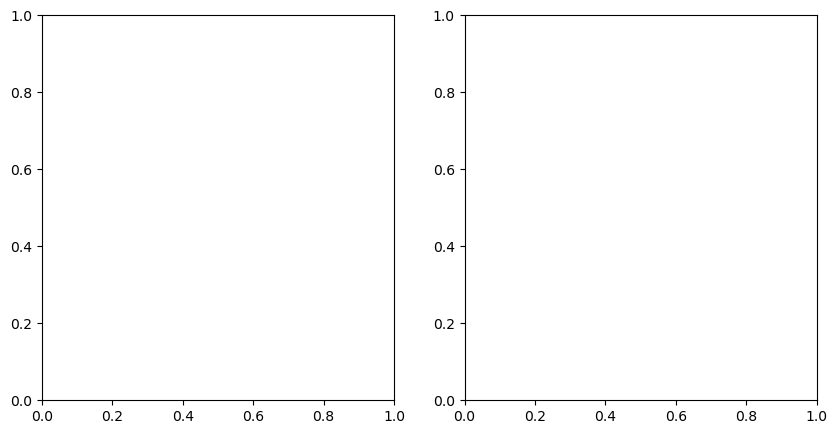

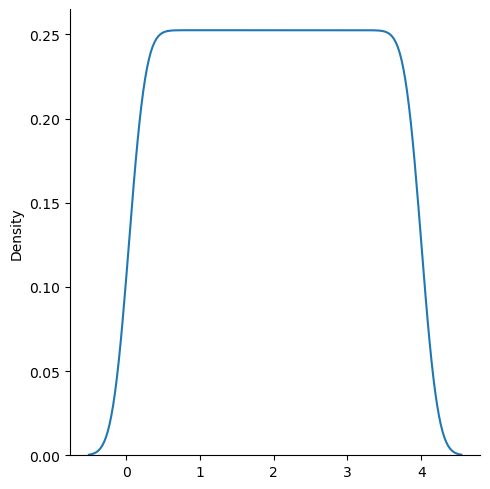

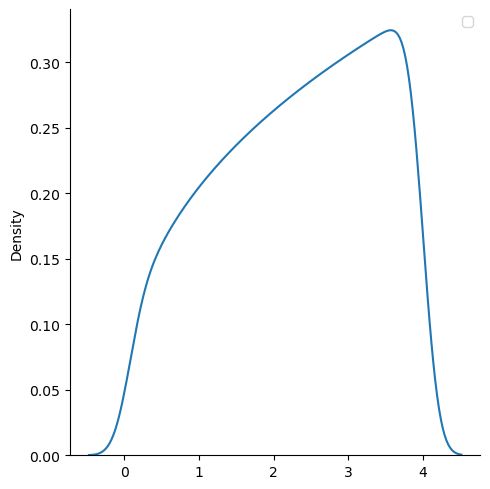

In [48]:
fig, ax = plt.subplots(1, 2)

sns.displot(x, kind = 'kde')
 
sns.displot(xt,  kind = 'kde')
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

In [46]:
help(sns.displot)

Help on function displot in module seaborn.distributions:

displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing distribution plots onto a FacetGrid.
    
    This function provides access to several approaches for visualizing the
    univariate or bivariate distribution of data, including subsets of data
    defined by semantic mapping and faceting across multiple subplots. The
    ``kind`` parameter selects the approach to use:
    
    - :func:`histplot` (with ``kind="hist"``; the default)
    - :func:`kdeplot` (with ``kind="kde"``)
    - :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)
    
    Additionally, a :func:`rugplot` can be added to any kind of plot to show
    individual observations.


<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

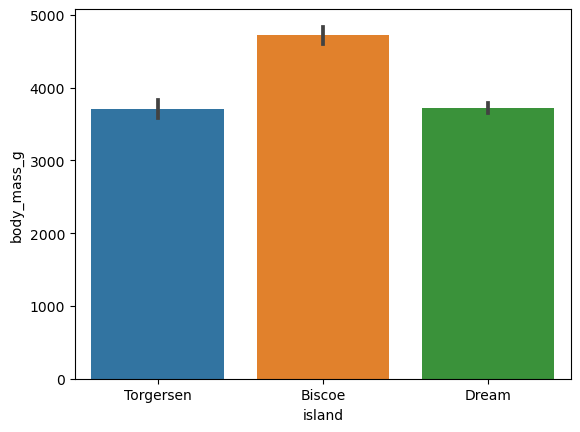

In [5]:
import seaborn as sns
df = sns.load_dataset("penguins")
sns.barplot(data=df, x="island", y="body_mass_g")

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

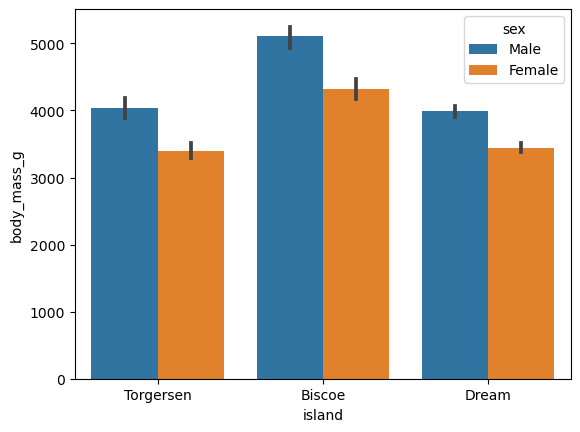

In [3]:
sns.barplot(data=df, x="island", y="body_mass_g", hue="sex")

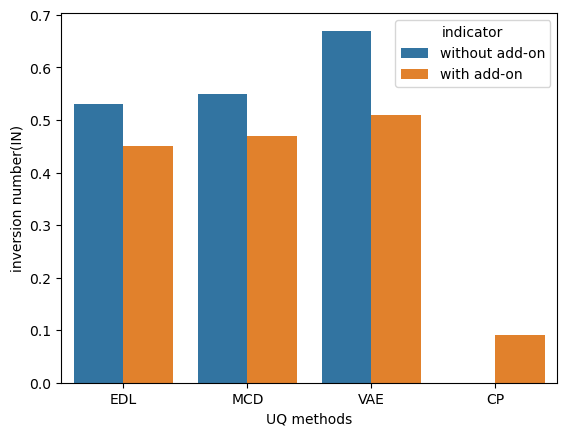

In [16]:
columns = ["inversion number(IN)", "UQ methods", "indicator"]
data = [[0.53, "EDL", "without add-on"],
       [0.45, "EDL", "with add-on"],
       [0.55, "MCD", "without add-on"],
       [0.47, "MCD", "with add-on"],
       [0.67, "VAE", "without add-on"],
       [0.51, "VAE", "with add-on"],
       [0, "CP", "without add-on"],
       [0.09, "CP", "with add-on"]]
df = pd.DataFrame(data, columns=columns)
sns.barplot(data=df, x="UQ methods", y="inversion number(IN)", hue="indicator")
plt.savefig("in_kdd.png", dpi=300)

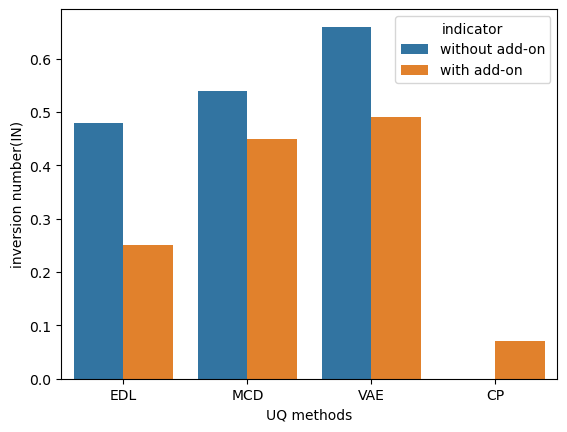

In [17]:
data = [[0.48, "EDL", "without add-on"],
       [0.25, "EDL", "with add-on"],
       [0.54, "MCD", "without add-on"],
       [0.45, "MCD", "with add-on"],
       [0.66, "VAE", "without add-on"],
       [0.49, "VAE", "with add-on"],
       [0, "CP", "without add-on"],
       [0.07, "CP", "with add-on"]]
df = pd.DataFrame(data, columns=columns)
sns.barplot(data=df, x="UQ methods", y="inversion number(IN)", hue="indicator")
plt.savefig("in_nsl.png", dpi=300)

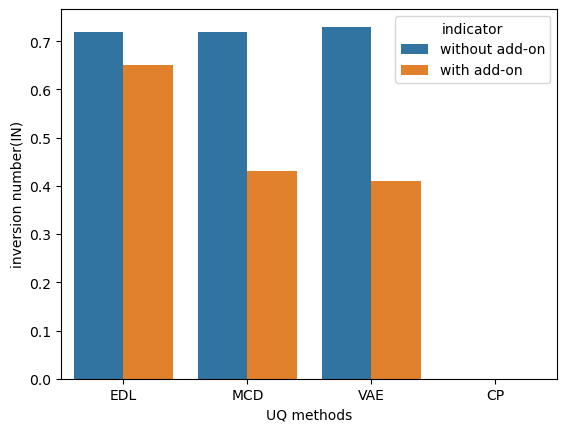

In [18]:
data = [[0.72, "EDL", "without add-on"],
       [0.65, "EDL", "with add-on"],
       [0.72, "MCD", "without add-on"],
       [0.43, "MCD", "with add-on"],
       [0.73, "VAE", "without add-on"],
       [0.41, "VAE", "with add-on"],
       [0, "CP", "without add-on"],
       [0, "CP", "with add-on"]]
df = pd.DataFrame(data, columns=columns)
sns.barplot(data=df, x="UQ methods", y="inversion number(IN)", hue="indicator")
plt.savefig("in_ids.png", dpi=300)

In [12]:
import numpy as np

from scipy.stats import entropy

base = 2  # work in units of bits

pk = np.array([[0.9, 0.1], [0.1, 0.9], [0.5, 0.5]])  
H = entropy(pk, base=base, axis=1)

H


array([0.46899559, 0.46899559, 1.        ])

In [31]:
pk

array([[0.9, 0.1],
       [0.1, 0.9],
       [0.5, 0.5]])

In [2]:

H == -np.sum(pk * np.log(pk)) / np.log(base)
H

1.0

In [25]:
p_0 = np.linspace(0, 1, 10)
p_1 = 1-p_0
np.concatenate((p_0.reshape(-1, 1), p_1.reshape(-1, 1)), axis=1)

array([[0.        , 1.        ],
       [0.11111111, 0.88888889],
       [0.22222222, 0.77777778],
       [0.33333333, 0.66666667],
       [0.44444444, 0.55555556],
       [0.55555556, 0.44444444],
       [0.66666667, 0.33333333],
       [0.77777778, 0.22222222],
       [0.88888889, 0.11111111],
       [1.        , 0.        ]])

In [30]:
p_0

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])